In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv(r"C:\Users\dshah\OneDrive\Documents\HeartDiseaseTrain-Test.csv")  

# Display dataset
print(df.head())
print(df.info())

# Encoding categorical features to numeric
categorical_columns = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 
                       'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia']

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save the encoder for future decoding if needed


   age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   
3    Lower than 120 mg/ml  ST-T wave abnormality             161   
4  Greater than 120 mg/ml  ST-T wave abnormality             106   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0                      No      1.0  Downsloping                           Two   
1 

In [3]:
# Features and target variable
X = df.drop('target', axis=1)  # Input features
y = df['target']              # Target variable (0 = No Heart Disease, 1 = Heart Disease)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 820, Testing samples: 205


In [4]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the model
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

Accuracy: 0.89
Classification Report:
                   precision    recall  f1-score   support

No Heart Disease       0.97      0.81      0.88       102
   Heart Disease       0.84      0.97      0.90       103

        accuracy                           0.89       205
       macro avg       0.90      0.89      0.89       205
    weighted avg       0.90      0.89      0.89       205



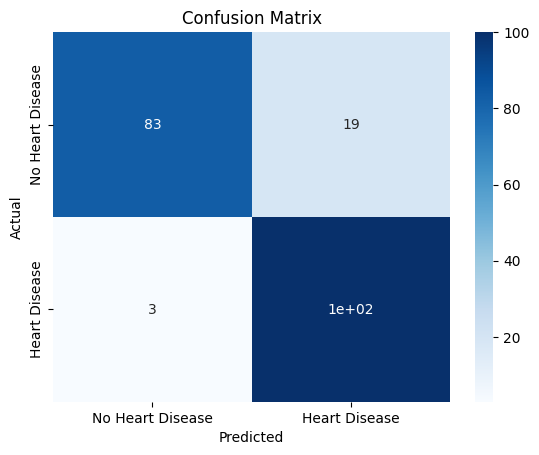

In [5]:
# Predict the classes of the test set
y_pred = rf.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["No Heart Disease", "Heart Disease"]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=["No Heart Disease", "Heart Disease"], yticklabels=["No Heart Disease", "Heart Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


                          Feature  Importance
2                 chest_pain_type    0.163790
12                    thalassemia    0.155907
11  vessels_colored_by_flourosopy    0.149004
9                         oldpeak    0.126669
7                  Max_heart_rate    0.110910
8         exercise_induced_angina    0.067290
0                             age    0.056690
10                          slope    0.048038
4                     cholestoral    0.045082
3          resting_blood_pressure    0.040067
1                             sex    0.023653
6                        rest_ecg    0.009798
5             fasting_blood_sugar    0.003102


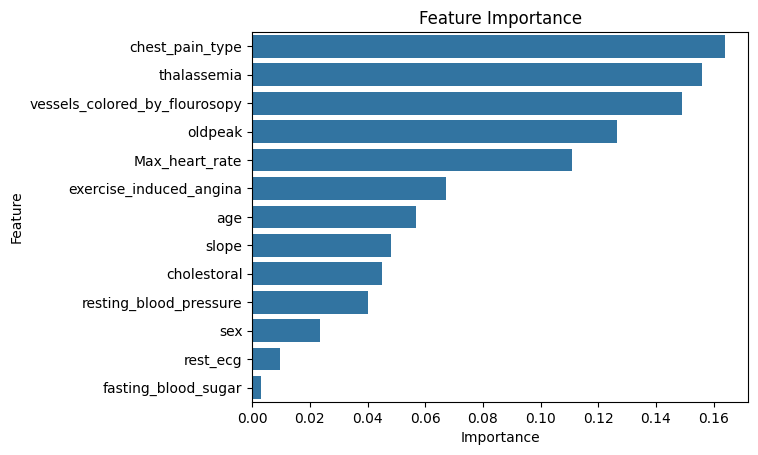

In [6]:
# Display feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance)

# Visualize feature importance
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title("Feature Importance")
plt.show()
